In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
data= pd.read_csv(r'D:\Machine-Learning-projects-master\Big_Mart_prediction\Train.csv')
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Little bit of summary of the data:
* we have some missing values
* We have categorical data om Item_Fat_content, Outlet_Establishment_Year
* We have non-numerical data on Item_Identifier, Outlet_type

In [4]:
# check the missing value
data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [9]:
# check how many item are there on the missing values
data['Item_Weight'].value_counts()
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
#fill the missing data with the median
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace= True)

In [19]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [20]:
# Let's convert the non-numerical columns to numerical data(through one-hot-encoded) using the get_dummies()
data_enc= pd.get_dummies(data)

In [21]:
#let's now check how the data looks like
data_enc.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
                                  ...   
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Length: 1605, dtype: object

In [30]:
data_enc.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [26]:
#check what are the missing datatypes
data_enc.isnull().any()

Item_Weight                      False
Item_Visibility                  False
Item_MRP                         False
Outlet_Establishment_Year        False
Item_Outlet_Sales                False
                                 ...  
Outlet_Location_Type_Tier 3      False
Outlet_Type_Grocery Store        False
Outlet_Type_Supermarket Type1    False
Outlet_Type_Supermarket Type2    False
Outlet_Type_Supermarket Type3    False
Length: 1605, dtype: bool

In [28]:
# let's check the correlation in the data
corr_matrix= data_enc.corr()
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693,-0.007619,0.031255,-0.025096,-0.016366,-0.038393,...,0.015976,-0.002791,-0.002981,0.002083,-0.007382,0.005174,-0.004778,0.011747,0.004956,-0.017723
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625,-0.017581,-0.010041,0.040746,0.005817,-0.027297,...,-0.041937,-0.081061,0.063502,0.061346,-0.068787,0.009650,0.286400,-0.144249,-0.034671,-0.051144
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574,0.000372,0.010633,0.021750,0.014643,0.018948,...,0.002438,-0.004510,0.009793,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-0.006714
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135,0.010573,-0.009699,-0.007165,-0.016808,0.003381,...,-0.453388,-0.016346,-0.056567,-0.201690,0.540820,-0.333895,-0.281196,0.245070,0.466336,-0.538072
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000,-0.005253,0.001091,0.007780,-0.007294,0.003515,...,0.024170,0.204701,-0.098403,-0.111287,0.058261,0.046376,-0.411727,0.108765,-0.038059,0.311192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Outlet_Location_Type_Tier 3,0.005174,0.009650,-0.000744,-0.333895,0.046376,0.005812,0.002085,0.006711,0.010512,0.000345,...,0.435419,0.391617,-0.502066,-0.502066,-0.560639,1.000000,0.093276,-0.636465,0.434369,0.436205
Outlet_Type_Grocery Store,-0.004778,0.286400,-0.004277,-0.281196,-0.411727,0.003156,0.013657,0.011314,-0.007159,0.005306,...,-0.133686,-0.266370,0.176158,0.176158,-0.265803,0.093276,1.000000,-0.524942,-0.133364,-0.133928
Outlet_Type_Supermarket Type1,0.011747,-0.144249,0.004885,0.245070,0.108765,0.000688,-0.004999,-0.009948,0.000486,0.007420,...,0.254668,-0.471782,0.163388,0.163388,0.506347,-0.636465,-0.524942,1.000000,-0.480943,-0.482977
Outlet_Type_Supermarket Type2,0.004956,-0.034671,0.003850,0.466336,-0.038059,0.004924,-0.010022,0.001586,-0.006559,-0.008469,...,-0.122481,0.500670,-0.218082,-0.218082,-0.243524,0.434369,-0.133364,-0.480943,1.000000,-0.122702


In [31]:
corr_matrix['Item_Outlet_Sales'].sort_values(ascending= False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.567574
Outlet_Type_Supermarket Type3    0.311192
Outlet_Identifier_OUT027         0.311192
Outlet_Size_Medium               0.204701
                                   ...   
Outlet_Location_Type_Tier 1     -0.111287
Item_Visibility                 -0.128625
Outlet_Identifier_OUT019        -0.277250
Outlet_Identifier_OUT010        -0.284883
Outlet_Type_Grocery Store       -0.411727
Name: Item_Outlet_Sales, Length: 1605, dtype: float64

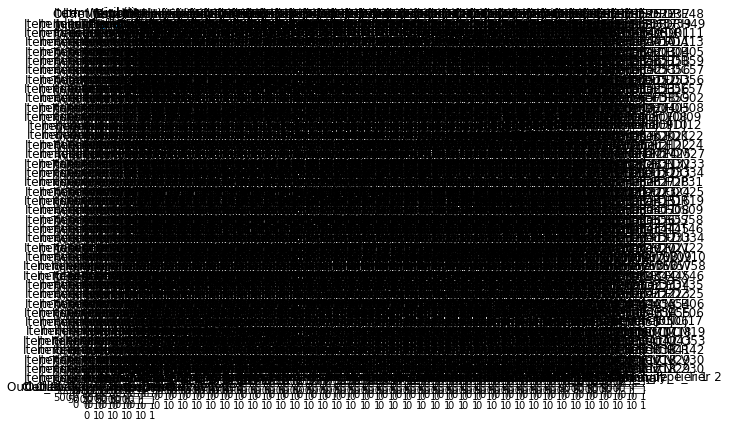

In [32]:
# plot the histograms of the dataset
data_enc.hist(figsize= (10,7), bins=50) #You can think of bins as the width of the bars in histogram
plt.show()

<AxesSubplot:>

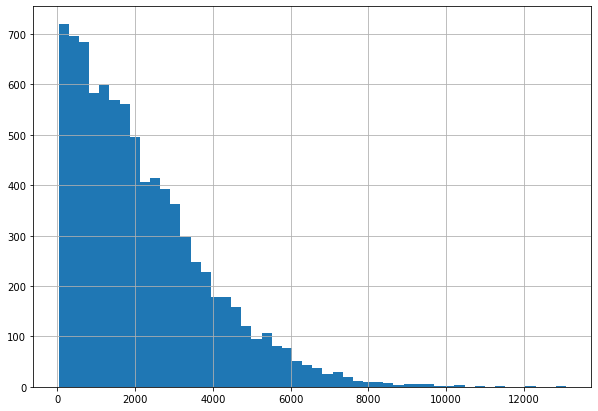

In [34]:
# let's modify the above program a bit
data_enc['Item_Outlet_Sales'].hist(bins=50, figsize= (10, 7))

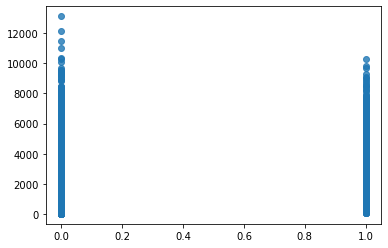

In [36]:
# scatter the sales and the outlet_shops
plt.scatter(x= data_enc['Outlet_Type_Supermarket Type1'], y= data_enc['Item_Outlet_Sales'], alpha= 0.8)

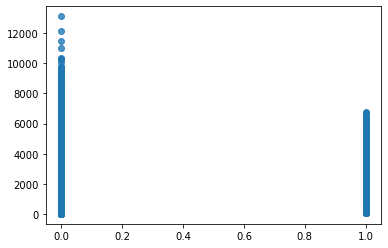

In [38]:
plt.scatter(x= data_enc['Outlet_Type_Supermarket Type2'], y= data_enc['Item_Outlet_Sales'], alpha= 0.8)

It's Kind of difficult to visualize this dataset as many of the values are one-hot-encoded

In [37]:
# ensure again there's no missing values anymore
data_enc.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Outlet_Sales                0
                                ..
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Length: 1605, dtype: int64